In [5]:
# 1. Import Libraries
# -------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
import os
import sys
import pandas as pd

# Make project root visible
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

DATA_PATH = os.path.join(PROJECT_ROOT, "data", "raw", "insurance.csv")
print("Looking for file at:", DATA_PATH)
print("File exists?", os.path.exists(DATA_PATH))

df = pd.read_csv(DATA_PATH)
df.head()


Looking for file at: c:\Users\hp\Documents\credit-risk-model\data\raw\insurance.csv
File exists? True


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# 3. Exploratory Data Analysis (EDA)
# -------------------------------------------------------------

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
display(df.describe())


Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Summary statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


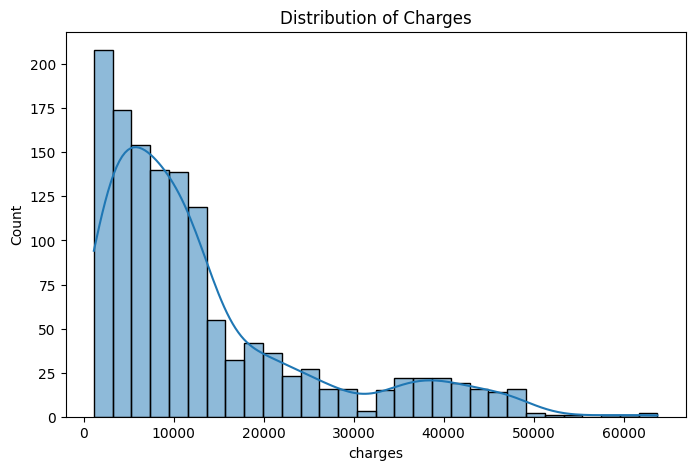

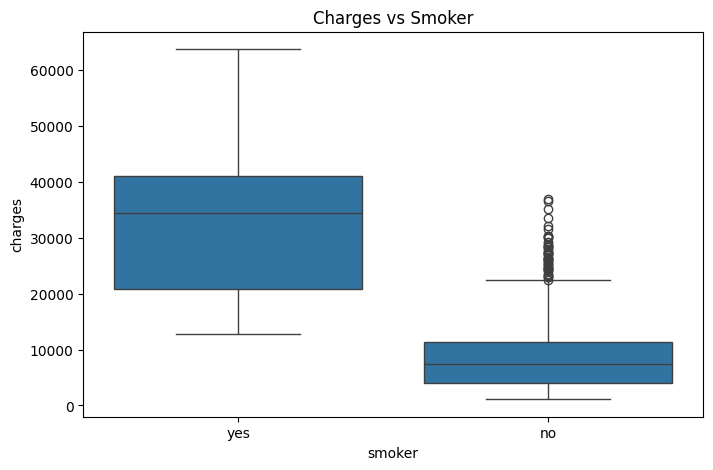

In [8]:
# Distribution of target variable 'charges'
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title("Distribution of Charges")
plt.show()

# Relationship between 'smoker' and charges
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges vs Smoker")
plt.show()

In [9]:
# Separate features and target
X = df.drop('charges', axis=1)
y = df['charges']

In [10]:
# Identify categorical and numerical columns
cat_features = ['sex', 'smoker', 'region']
num_features = ['age', 'bmi', 'children']

In [11]:
# - Numerical features are scaled for regression (mean=0, std=1)
# - Categorical features are one-hot encoded (drop first to avoid multicollinearity)
# - Preprocessing ensures data is ready for model training

In [12]:
# Identify categorical and numerical columns
cat_features = ['sex', 'smoker', 'region']
num_features = ['age', 'bmi', 'children']

In [13]:
# Build preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ]
)

In [14]:
# - Split dataset into training (80%) and testing (20%)
# - Ensures we evaluate model on unseen data

In [15]:
# 5. Train-Test Split
# -------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# 6. Model Training - Linear Regression
# -------------------------------------------------------------
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [17]:
# Train model
lr_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformer

In [18]:
# Predictions
y_pred_lr = lr_pipeline.predict(X_test)

In [19]:
# RMSE - A smaller RMSE indicates predictions are closer to the true values.
# R2 - 1 means perfect prediction, 0 means the model does no better than predicting the mean.

In [20]:
# Evaluation
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression R²: {r2_lr:.2f}")

Linear Regression RMSE: 5796.28
Linear Regression R²: 0.78


Pipeline([...])- Chains preprocessing and model together so GridSearch can handle everything automatically.

In [21]:
# Model Training - Random Forest Regressor
# -------------------------------------------------------------
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [22]:
# - Random Forest is an ensemble of decision trees
# - Can capture non-linear relationships
# - Usually performs better than linear regression on complex datasets

In [23]:
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [24]:
rmse_rf =  np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")

Random Forest RMSE: 4567.78
Random Forest R²: 0.87


Hyperparameters

a) n_estimators - Number of trees in the Random Forest.

- Type: Integer

Why it matters:

- More trees → better accuracy and stability (reduces variance)

- Fewer trees → faster computation, but might be less accurate

Each tree is like a single “opinion” of the forest. More opinions → more reliable overall decision.

b) max_depth - Maximum depth of each tree.

- Type: Integer or None

Values example: [None, 5, 10]

- None → trees grow until all leaves are pure or have minimum samples

- 5 → tree can split at most 5 levels

- 10 → tree can split at most 10 levels

Why it matters:

- Deep trees → can model complex patterns → risk of overfitting

- Shallow trees → simpler model → risk of underfitting

Think of the tree like a decision-making process. Depth = how detailed each decision can get.

c) min_samples_split - Minimum number of samples required to split an internal node.

- Type: Integer

Why it matters:

- Low value → nodes split even with few samples → may overfit

- High value → nodes require more data to split → model is more generalizable

Imagine only splitting a decision if you have enough evidence. More evidence → more reliable splits.

In [25]:
# Hyperparameter Tuning - Random Forest
# -------------------------------------------------------------
param_grid = {
    'regressor__n_estimators': [50, 100, 200],  # Number of trees
    'regressor__max_depth': [None, 5, 10],      # Depth of each tree
    'regressor__min_samples_split': [2, 5, 10]  # Minimum samples to split a node
}

Training data split into 3 folds

Train on 2 folds, validate on 1 fold

In [26]:
# Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(
    rf_pipeline,       # model pipeline
    param_grid,        # hyperparameter grid
    cv=3,              # 3-fold cross-validation
    scoring='r2',      # evaluation metric
    verbose=2          # print progress
)


In [27]:
# Fit grid search
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=50; total time=   0.3s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=50; total time=   0.3s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=50; total time=   0.3s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.7s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.6s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.7s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   1.5s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=200; total time=   1.5s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regress

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'regressor__max_depth': [None, 5, ...], 'regressor__min_samples_split': [2, 5, ...], 'regressor__n_estimators': [50, 100, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and pa

In [28]:
# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_) # Returns the hyperparameter combination with the highest average CV score.

Best Hyperparameters: {'regressor__max_depth': 5, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}


In [29]:
# Evaluate tuned model
y_pred = grid_search.predict(X_test) # Makes predictions using the best model found in the grid search.
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Tuned Random Forest RMSE: {rmse:.2f}")
print(f"Tuned Random Forest R²: {r2:.2f}")

Tuned Random Forest RMSE: 4437.38
Tuned Random Forest R²: 0.87


- Hyperparameter tuning helps find the “best” settings for a model.

- Grid Search is exhaustive, trying all combinations — can be slow.

- Cross-validation ensures robust evaluation, avoiding overfitting.

- After tuning, we evaluate on completely unseen test data to see real performance.
